<a href="https://colab.research.google.com/github/ImAbhijeetPanda/Abnormalities-Detection-and-Predictive-Maintenance-for-Industrial-Equipment/blob/main/Final_Copy_Abnormalities_Detection_and_Predictive_Maintenance_for_Industrial_Equipment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Abnormalities Detection and Predictive Maintenance for Industrial Equipment



##### **Project Type**    - EDA and Classification
##### **Contribution**    - Individual
##### **Name**            - Abhijeet Panda


# **Project Summary -**

Industrial machines generate large amounts of sensor data, such as temperature, speed, torque, and tool wear.  
Detecting **failures** in this data is crucial to prevent unexpected breakdowns and improve operational efficiency.  

This project aims to build a **machine learning model** that can:  
1. **Identify failures** in industrial equipment based on sensor readings.  
2. **Classify failure types** to help in troubleshooting.  
3. **Visualize results** in a user-friendly dashboard for real-time monitoring.  


## Dataset Overview  

The dataset consists of **10,000 records** with the following features:  

- **UID**: Unique identifier ranging from **1 to 10,000**.  
- **Product ID**: Consists of a letter **L, M, or H**, representing product quality:  
  - **L (50%)** – Low quality  
  - **M (30%)** – Medium quality  
  - **H (20%)** – High quality  
  - Followed by a variant-specific serial number.  
- **Air Temperature [K]**: Generated using a **random walk process**, normalized with a **standard deviation of 2 K** around **300 K**.  
- **Process Temperature [K]**: Calculated as **Air Temperature + 10 K**, with a **standard deviation of 1 K**.  
- **Rotational Speed [rpm]**: Derived from a **power of 2860 W**, overlaid with **normally distributed noise**.  
- **Torque [Nm]**: Normally distributed around **40 Nm**, with a **standard deviation (σ) of 10 Nm** (no negative values).  
- **Tool Wear [min]**:  
  - **H (High Quality)** → +5 minutes  
  - **M (Medium Quality)** → +3 minutes  
  - **L (Low Quality)** → +2 minutes  
- **Machine Failure (Target Variable)**:  
  - Indicates whether the machine **has failed** at a given data point.  
  - Failure can occur due to different **failure types**.  

This dataset helps in detecting **machine failures** by analyzing sensor readings.   

## Goal  
- Use **machine learning** to detect machine failures.  
- Develop a **dashboard** to visualize failure trends and provide alerts.  

## Tools & Technologies  
- **Python, Pandas, NumPy** for data processing  
- **Scikit-learn** for machine learning models  
- **Matplotlib, Seaborn** for data visualization  
- **Flask** for building a simple user interface  
- **Google Colab** for implementation  

This project will help in **minimizing downtime**, **reducing maintenance costs**, and **improving machine reliability**.



# **Objective**


- Develop a machine learning model to detect abnormalities in sensor data from equipment.
- Predict when maintenance is required to prevent equipment failure.

# ***Let's Begin !***

# ***1. Know the Data***

### Importing Libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning and Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### Dataset Loading

In [2]:
# Load Dataset
data = pd.read_csv('/content/predictive_maintenance.csv')

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(10000, 10)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
sum(data.duplicated())

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


#### Dataset Describe

In [8]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
unique_values = {col: data[col].nunique() for col in data.columns}

# Convert to a DataFrame for better display
unique_values_df = pd.DataFrame(list(unique_values.items()), columns=['Column', 'Unique Values'])

# Display the DataFrame
print(unique_values_df)

# Count unique values in each column
unique_counts = data.nunique()

# Display unique values for columns with less than 10 unique values
for col in data.columns:
    if unique_counts[col] < 10:
        print(f"Column: {col}")
        print("Unique Values:", data[col].unique())
        print("-" * 30)

                    Column  Unique Values
0                      UDI          10000
1               Product ID          10000
2                     Type              3
3      Air temperature [K]             93
4  Process temperature [K]             82
5   Rotational speed [rpm]            941
6              Torque [Nm]            577
7          Tool wear [min]            246
8                   Target              2
9             Failure Type              6
Column: Type
Unique Values: ['M' 'L' 'H']
------------------------------
Column: Target
Unique Values: [0 1]
------------------------------
Column: Failure Type
Unique Values: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']
------------------------------


## ***2. Understanding the Variables***

### Dataset Summary

#### 1. General Information
- The dataset contains **10,000 rows** and **10 columns**.
- There are **no missing values** or **null values** in any column.
- There are **no duplicate records** in the dataset.

#### 2. Unique Values
- **UID** and **Product ID** have **10,000 unique values**, meaning each row has a unique identifier.
- **Type** has **3 unique values**: `['M', 'L', 'H']`, representing different product quality levels.
- **Target (Failure or Not)** has **2 unique values**: `[0, 1]`, where `0` means no failure and `1` means failure.
- **Failure Type** has **6 unique values**:  
  - `'No Failure'`  
  - `'Power Failure'`  
  - `'Tool Wear Failure'`  
  - `'Overstrain Failure'`  
  - `'Random Failures'`  
  - `'Heat Dissipation Failure'`  

#### 3. Statistical Insights
- **Air Temperature [K]**: Ranges from **295.3 K to 304.5 K** with a mean of **300 K**.  
- **Process Temperature [K]**: Ranges from **305.7 K to 313.8 K** with a mean of **310 K**.  
- **Rotational Speed [rpm]**: Varies between **1168 and 2886 rpm**, with a mean of **1538 rpm**.  
- **Torque [Nm]**: Ranges from **3.8 to 76.6 Nm**, with a mean of **39.98 Nm**.  
- **Tool Wear [min]**: Varies between **0 and 253 minutes**, with a mean of **107.95 minutes**.  

#### 4. Key Observations about Dataset
- The dataset is **clean** with **no missing or duplicate values**.
- Most features are **numerical**, except for **Type** and **Failure Type**, which are **categorical**.
- **Failures occur in only a small portion of the data** (`Target` mean is **0.0339**, meaning ~3.4% of cases have failures).
- **Different failure types** exist, making it important to classify failures properly.

This dataset is well-structured for **machine failure detection** and will be used to train a model for **abnormality detection**.

In [10]:
#Shaving the dataset and creating a copy for further  studies
df = data.copy()

# **3. Data Wrangling, Data Vizualization, Experimenting with charts : Understand the relationships between variables and takking Nacessary steps**

### Data Wrangling Code

In [11]:
# Drop ID columns
df.drop(columns=['UDI','Product ID'], inplace=True)

In [12]:
# Set numeric columns dtype to float
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')
# Rename features
df.rename(mapper={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)

In [13]:
# Create lists of features and target names
features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']
target = ['Target','Failure Type']
# Portion of data where RNF=1
idx_RNF = df.loc[df['Failure Type']=='Random Failures'].index
df.loc[idx_RNF,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [14]:
first_drop = df.loc[idx_RNF,target].shape[0]
print('Number of observations where RNF=1 but Machine failure=0:',first_drop)
# Drop corresponding observations and RNF column
df.drop(index=idx_RNF, inplace=True)

Number of observations where RNF=1 but Machine failure=0: 18


Fortunately the machine failure RNF occurs in only 18 observations and it has a random nature therefore not predictable so we decide to remove these rows.

In [15]:
# Portion of data where Machine failure=1 but no failure cause is specified
idx_ambiguous = df.loc[(df['Target']==1) &
                       (df['Failure Type']=='No Failure')].index
display(df.loc[idx_ambiguous,target])

,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [16]:
# Find indices where 'Target' is 1 but 'Failure Type' is 'No Failure'
idx_ambiguous = df.loc[(df['Target'] == 1) & (df['Failure Type'] == 'No Failure')].index

# Set 'Target' to 0 for these indices
df.loc[idx_ambiguous, 'Target'] = 0

#### Outliers inspection

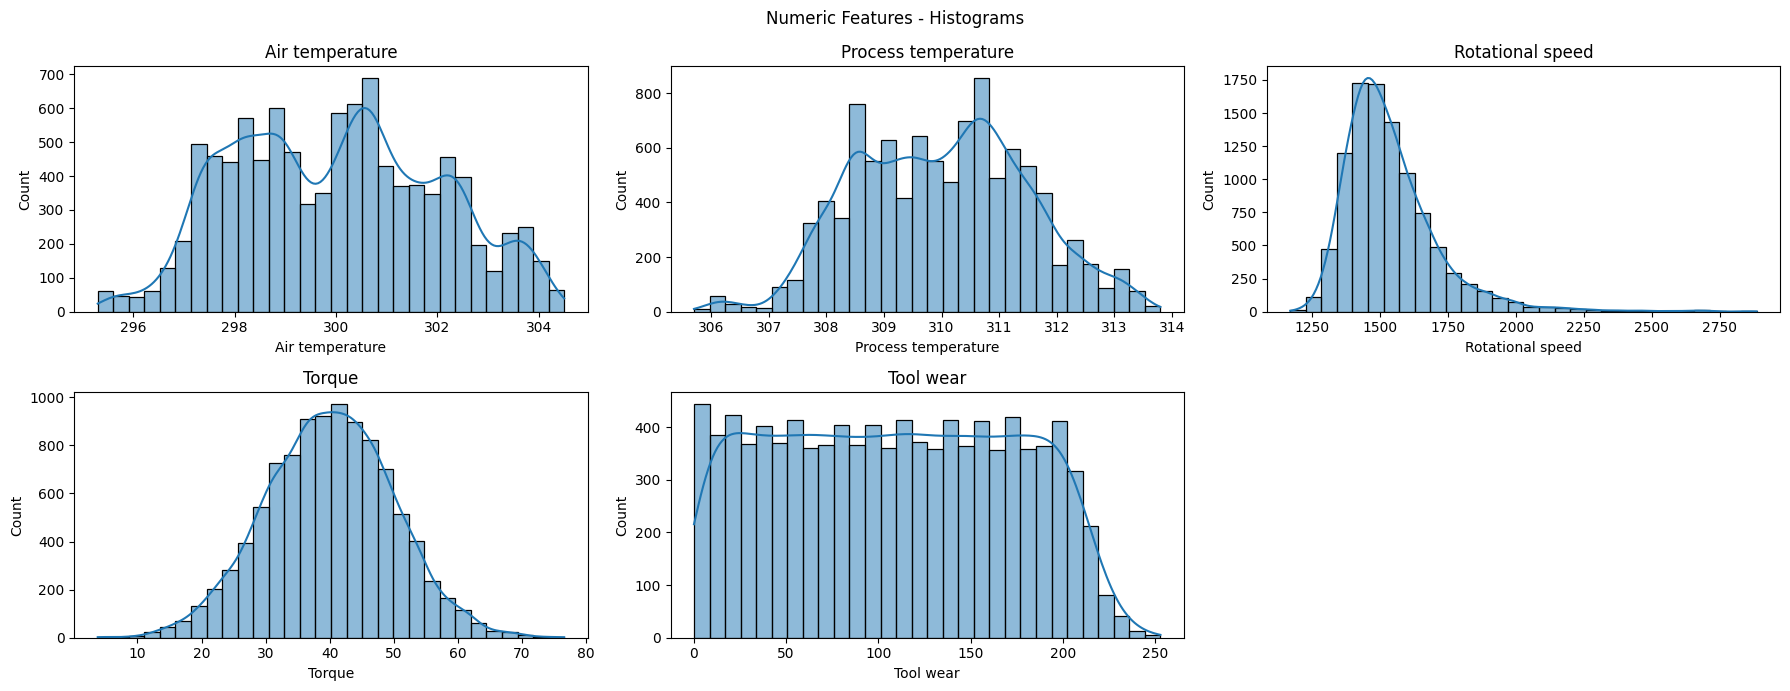

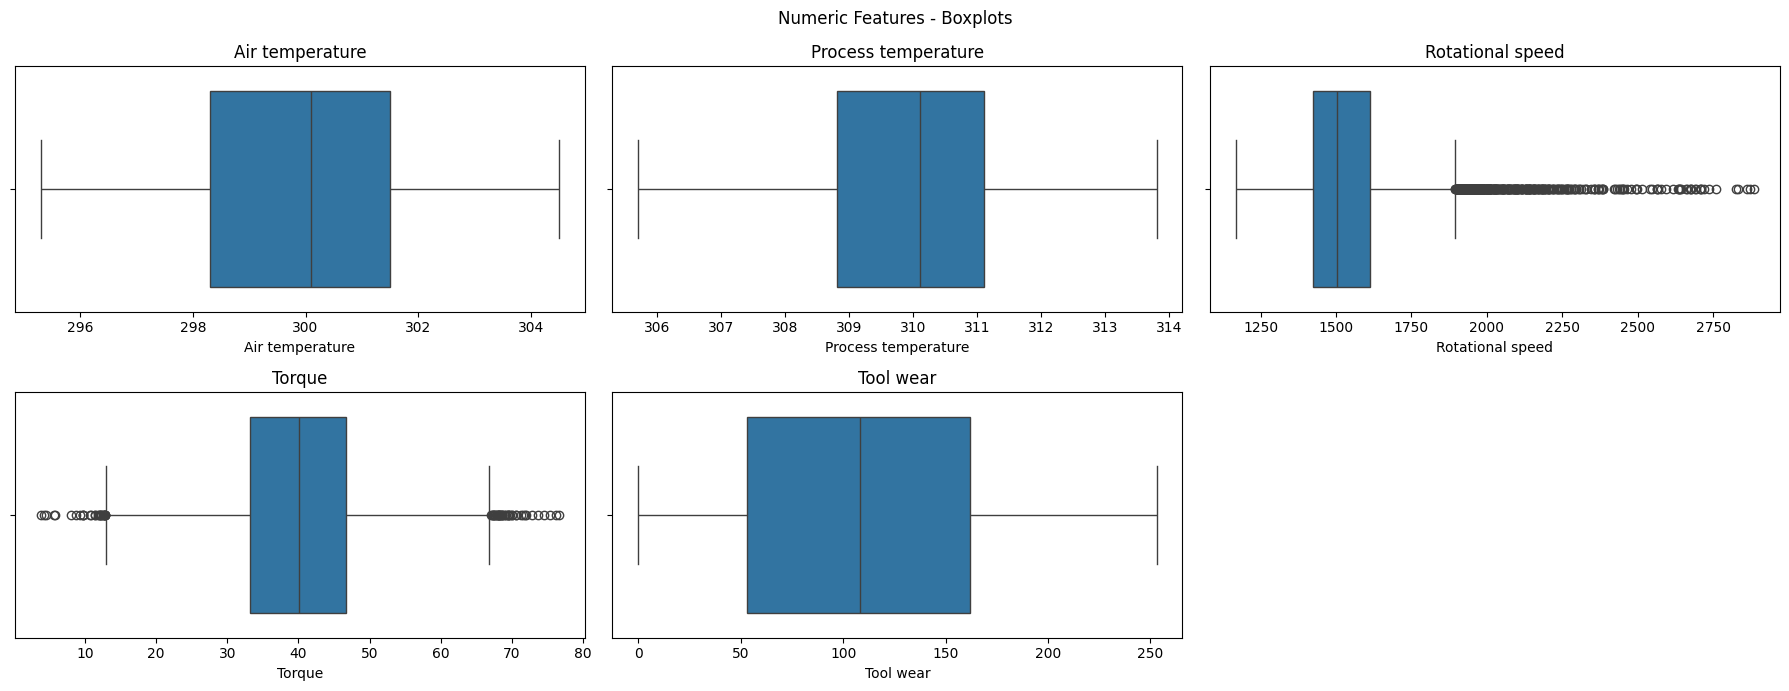

In [17]:
# List of numerical features
num_features = [feature for feature in features if df[feature].dtype == 'float64']

# Plot histograms
plt.figure(figsize=(18, 7))
plt.suptitle('Numeric Features - Histograms')

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

# Plot boxplots
plt.figure(figsize=(18, 7))
plt.suptitle('Numeric Features - Boxplots')

for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

##### **Outlier Analysis**

- The **Rotational Speed** feature shows a **right-skewed distribution** with many extreme values on the higher side. The box plot also reveals a significant number of outliers. These outliers might indicate **sensor anomalies** or **unusual machine behavior** before failure.

- The **Torque** feature has **outliers on both sides**, meaning there are extreme low and high values. These outliers could be crucial as they might represent **stress conditions** leading to equipment failure.

#### **Decision on Outliers:**
Instead of removing these outliers, I will **retain them** because they could be key indicators of faulty sensor data or **early signs of failure**. Removing them might result in the loss of valuable information necessary for **failure detection**.

#### Chart - 1

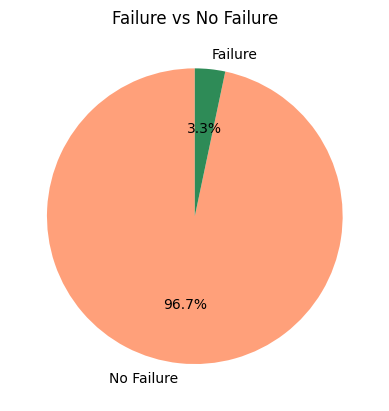

In [18]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

# Count target values
target_counts = df['Target'].value_counts()

# Create pie chart
plt.pie(target_counts, labels=['No Failure', 'Failure'], autopct='%1.1f%%',
        colors=['lightsalmon','seagreen' ], startangle=90)
plt.title('Failure vs No Failure')
plt.show()

#### Chart - 2

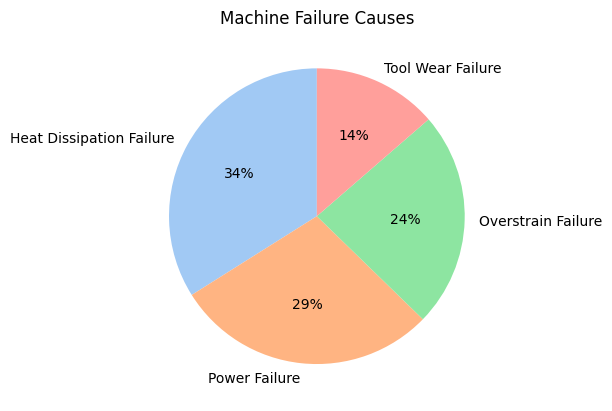

In [19]:
# Chart - 2 visualization code
# Filter data where failure occurred
df_fail = df[df['Failure Type'] != 'No Failure']

# Calculate failure type percentages
failure_percentages = df_fail['Failure Type'].value_counts(normalize=True) * 100

# Plot pie chart
plt.pie(failure_percentages, labels=failure_percentages.index, autopct='%.0f%%',
        colors=sns.color_palette('pastel'), startangle=90)
plt.title('Machine Failure Causes')
plt.show()

#### Chart - 3

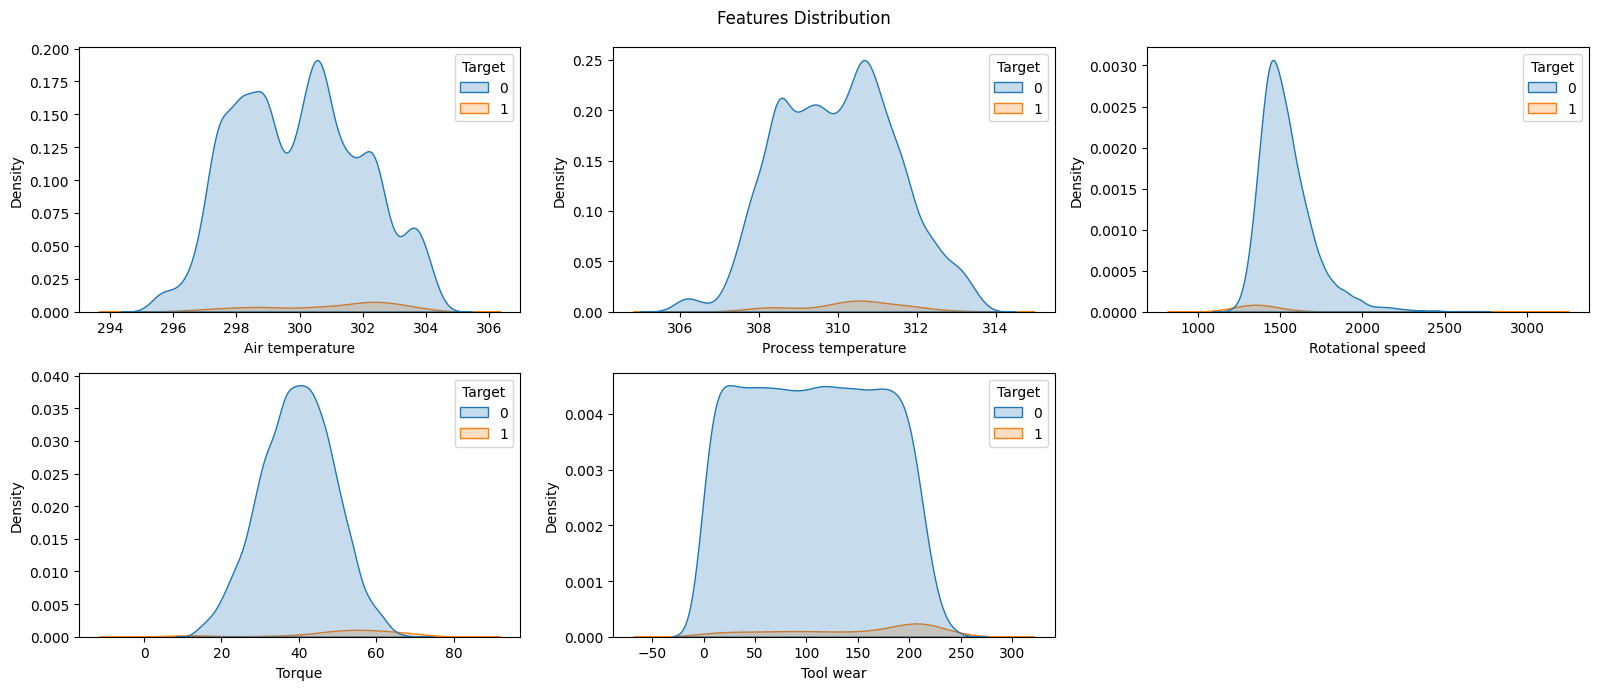

In [20]:
# KDE plot for numeric features
fig, axs = plt.subplots(2, 3, figsize=(16, 7))
fig.suptitle('Features Distribution')

# Flatten the axes array for easier indexing
axs = axs.flatten()

for i, feature in enumerate(num_features):
    sns.kdeplot(data=df, x=feature, hue='Target', fill=True, ax=axs[i], palette='tab10')

# Hide unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### Chart - 4

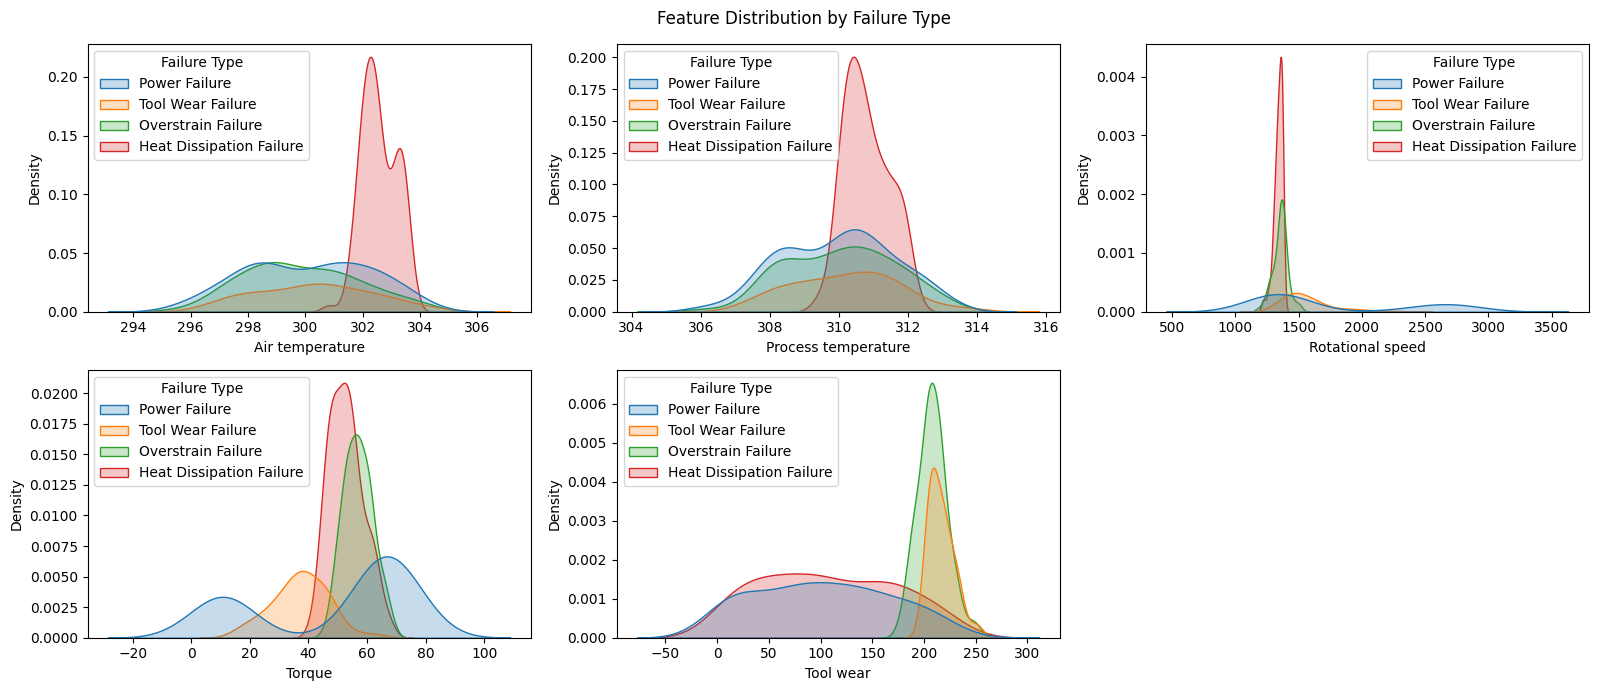

In [21]:
# Chart - 4 visualization code
# Filter data where Target is 1 (machine failed)
df_failed = df[df['Target'] == 1]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(16, 7))
fig.suptitle('Feature Distribution by Failure Type')

axs = axs.flatten()  # Flatten for easy indexing

for i, feature in enumerate(num_features):
    sns.kdeplot(data=df_failed, x=feature, hue='Failure Type', fill=True, ax=axs[i], palette='tab10')

# Remove empty subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### Chart - 5

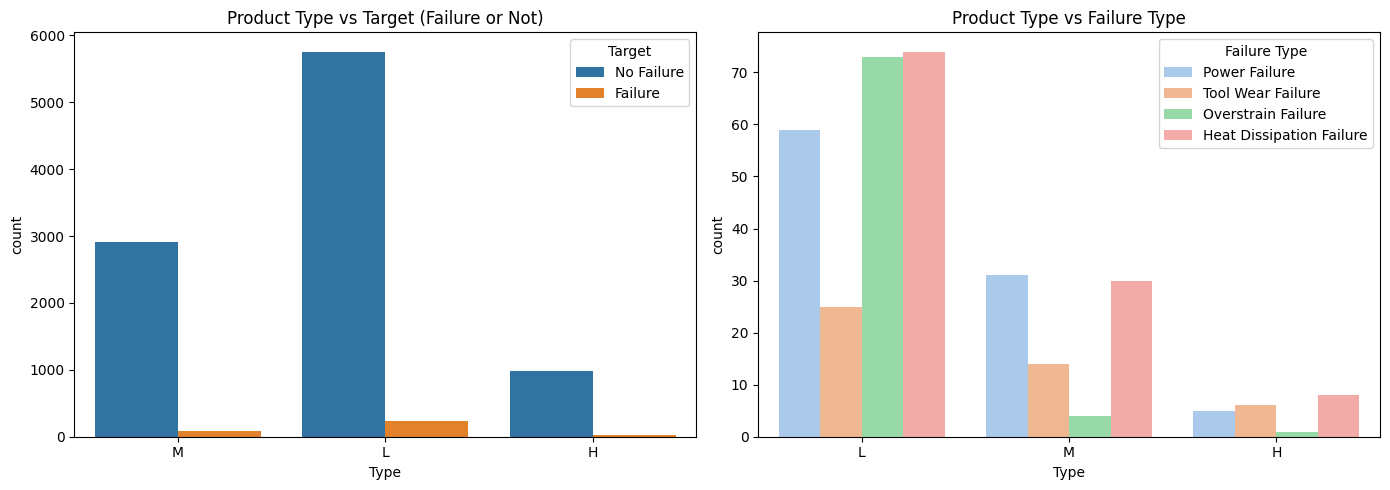

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for Type vs Target
sns.countplot(data=df, x='Type', hue='Target', ax=axs[0])
axs[0].set_title('Product Type vs Target (Failure or Not)')
axs[0].legend(title='Target', labels=['No Failure', 'Failure'])

# Count plot for Type vs Failure Type (only failed cases)
df_failed = df[df['Target'] == 1]
sns.countplot(data=df_failed, x='Type', hue='Failure Type', ax=axs[1], palette='pastel')
axs[1].set_title('Product Type vs Failure Type')
axs[1].legend(title='Failure Type')

plt.tight_layout()
plt.show()

<ipython-input-23-b12e123bb6c2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Type', y='Target', ax=axs[0], palette='tab10')
<ipython-input-23-b12e123bb6c2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_failed, x='Type', y=df_failed['Failure Type'].astype('category').cat.codes, ax=axs[1], palette='tab10')


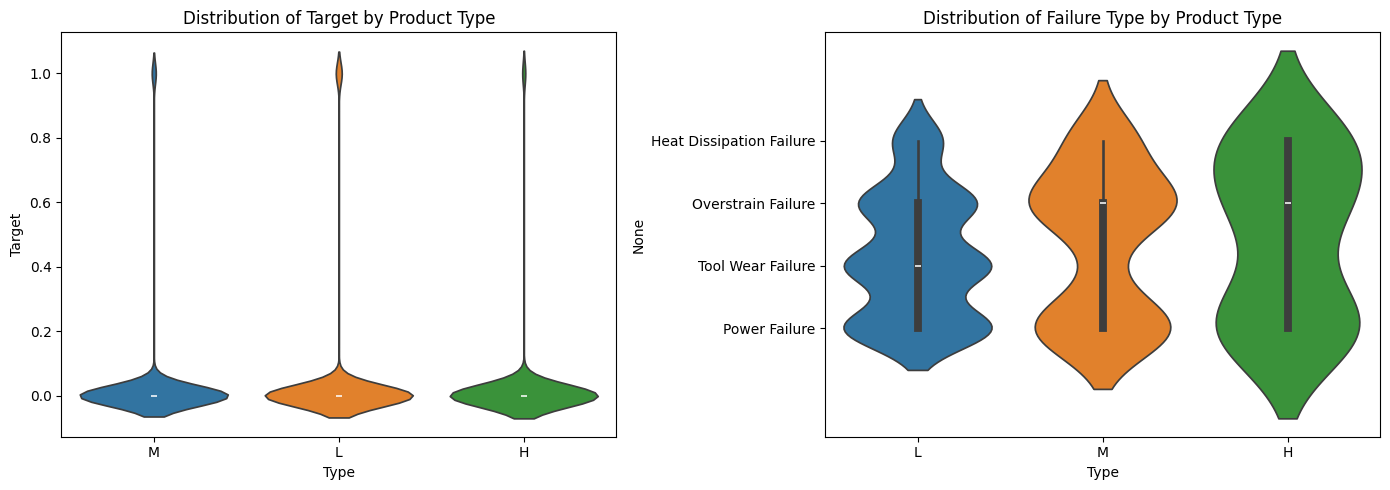

In [23]:
#Figure
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Violin plot for Type vs Target
sns.violinplot(data=df, x='Type', y='Target', ax=axs[0], palette='tab10')
axs[0].set_title('Distribution of Target by Product Type')

# Violin plot for Type vs Failure Type (only failed cases)
df_failed = df[df['Failure Type'] != 'No Failure']
sns.violinplot(data=df_failed, x='Type', y=df_failed['Failure Type'].astype('category').cat.codes, ax=axs[1], palette='tab10')
axs[1].set_title('Distribution of Failure Type by Product Type')
axs[1].set_yticks(range(len(df_failed['Failure Type'].unique())))
axs[1].set_yticklabels(df_failed['Failure Type'].unique())

plt.tight_layout()
plt.show()

In [24]:
#copy the dataset for next preprocessing
df1 = df.copy()

## Features scaling and Encoding


- In order to make data exploitable for the algorithms we will run, we apply two transformations:

- First, we apply a label encoding to the categorical columns, since Type is an ordinal feature and Cause must be represented in one column. The mapping follows this scheme: Type: {L=0, M=1, H=2} Cause: {Working=0, PWF=1, OSF=2, HDF=3, TWF=4}

In [25]:
# Encode categorical variables
df1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
df1['Failure Type'].replace({'No Failure': 0, 'Power Failure': 1, 'Overstrain Failure': 2, 'Heat Dissipation Failure': 3, 'Tool Wear Failure': 4}, inplace=True)

<ipython-input-25-0faf50aaeedf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
<ipython-input-25-0faf50aaeedf>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
<ipython-input-25-

#### Chart - 6

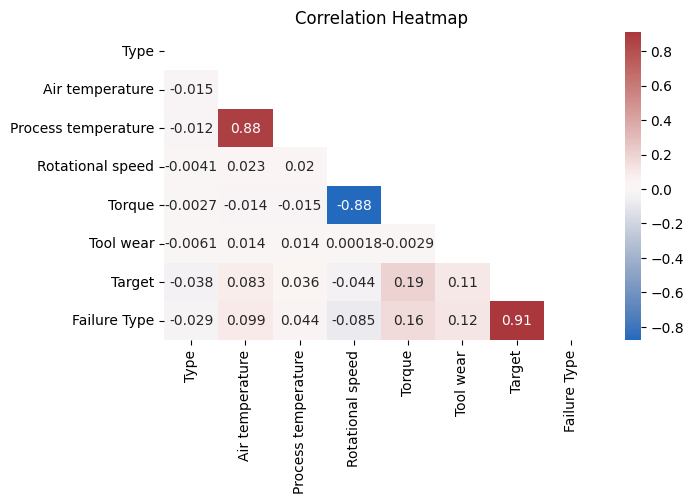

In [26]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(df1.corr(), mask=np.triu(df1.corr()), annot=True, cmap='vlag')
plt.title('Correlation Heatmap')
plt.show()

**Analysis of the Correlation Heatmap**


**A. Strong Positive Correlation (Red)**  
- Process Temperature and Air Temperature (**0.88**)  
  - As air temperature increases, process temperature also increases.  
  - This makes sense because the process temperature depends on the surrounding air.  

- Failure Type and Target (**0.91**)  
  - This is expected because `Target` represents machine failure (1 = Failure, 0 = No Failure),  
    and `Failure Type` categorizes those failures.  
  - A machine can only have a failure type if it has failed (Target = 1).  

**B. Strong Negative Correlation (Blue)**  
- Torque and Rotational Speed (**-0.88**)  
  - When the rotational speed increases, torque decreases, which aligns with physics principles.  
  - High-speed machines usually require less torque to maintain motion.  

**C. Medium Correlations (0.1 to 0.2)**  
- Tool Wear has a weak positive correlation (**0.12**) with Target.  
  - This means tool wear may contribute to failures, but it’s not the only factor.  
  - Further analysis is needed to confirm its direct impact.  

- Torque and Target (**0.19**)  
  - A slight correlation suggests torque may play a role in machine failures,  
    but other factors contribute as well.  

**D. Low or No Correlation (Close to 0)**  
- Type has almost no correlation with other features.  
  - This suggests that machine type does not significantly impact failures or sensor readings.  
  - We might want to check if this feature is truly important for modeling.  

🔍 **Insights & Next Steps**   
- Rotational speed and torque have a strong inverse relationship → Confirms expected physical behavior.  
- Tool wear, torque, and temperature factors may contribute to failures → Further investigation is needed to confirm direct impact.  


# ***4. Handaling Imbalance Data***

In [27]:
df2 = df.copy()

I used Over-Sampling with SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset because the ‘No Failure’ class was significantly larger than the failure types. This imbalance could bias the model, making it predict ‘No Failure’ more often. SMOTE generated synthetic samples for the minority failure classes, helping the model learn patterns from all failure types and improving its ability to detect failures accurately.



In [28]:
from imblearn.over_sampling import SMOTENC

# Make a copy of df2 to avoid modifying original data
df2_copy = df2.copy()

# Convert 'Failure Type' to categorical codes
df2_copy['Failure Type'] = df2_copy['Failure Type'].astype('category').cat.codes

# Count 'No Failure' class
n_working = (df2['Failure Type'] == 'No Failure').sum()

# Calculate desired dataset length (80% of total)
desired_length = round(n_working / 0.8)

# Calculate samples per failure class
spc = round((desired_length - n_working) / 4)

# Define resampling strategy (now using numerical codes)
balance_cause = {
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'No Failure'].iloc[0]: n_working,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Overstrain Failure'].iloc[0]: spc,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Heat Dissipation Failure'].iloc[0]: spc,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Power Failure'].iloc[0]: spc,
    df2_copy['Failure Type'].astype('category').cat.codes[df2['Failure Type'] == 'Tool Wear Failure'].iloc[0]: spc
}

# Get categorical feature index
cat_features = [df2.columns.get_loc('Type')]  # 'Type' is categorical

# Apply SMOTENC
sm = SMOTENC(categorical_features=cat_features, sampling_strategy=balance_cause, random_state=0)
df_res, y_res = sm.fit_resample(df2_copy, df2_copy['Failure Type'])

# Convert 'Failure Type' back to original labels
df_res['Failure Type'] = df2['Failure Type'].astype('category').cat.categories[df_res['Failure Type']]

# Show the resampled dataset
df_res.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure


Percentage increment of observations after oversampling: 20.86
SMOTE Resampled Failures percentage: 19.99


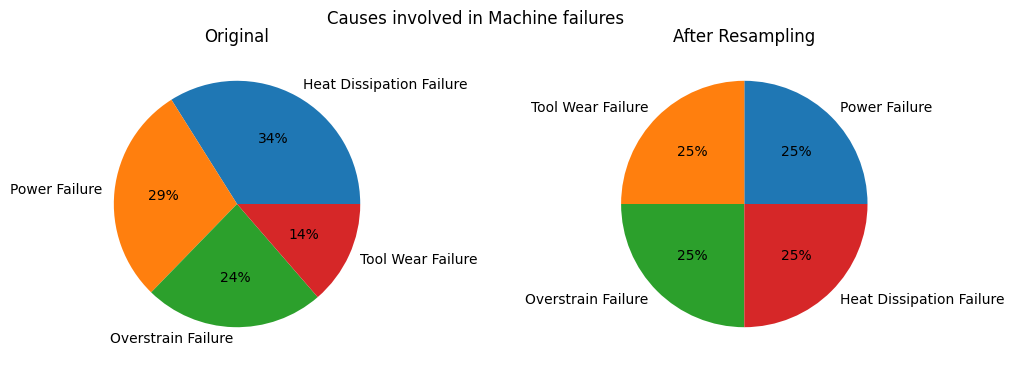

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Portion of df_res where there is a failure and causes percentage
df_res_fail = df_res[df_res['Failure Type'] != 'No Failure']
fail_res_percentage = 100 * df_res_fail['Failure Type'].value_counts() / df_res_fail.shape[0]

# Original failure percentage before SMOTE
df_fail = df2[df2['Failure Type'] != 'No Failure']
df_fail_percentage = 100 * df_fail['Failure Type'].value_counts() / df_fail.shape[0]

# Percentage increase in dataset size
print('Percentage increment of observations after oversampling:',
      round((df_res.shape[0] - df2.shape[0]) * 100 / df2.shape[0], 2))
print('SMOTE Resampled Failures percentage:',
      round(df_res_fail.shape[0] * 100 / df_res.shape[0], 2))

# Pie plot comparison
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
fig.suptitle('Causes involved in Machine failures')

# Original Data Pie Chart
axs[0].pie(df_fail_percentage, labels=df_fail_percentage.index,
           colors=sns.color_palette('tab10')[:5], autopct='%.0f%%')
axs[0].set_title('Original')

# SMOTE Resampled Data Pie Chart
axs[1].pie(fail_res_percentage, labels=fail_res_percentage.index,
           colors=sns.color_palette('tab10')[:5], autopct='%.0f%%')
axs[1].set_title('After Resampling')

plt.show()

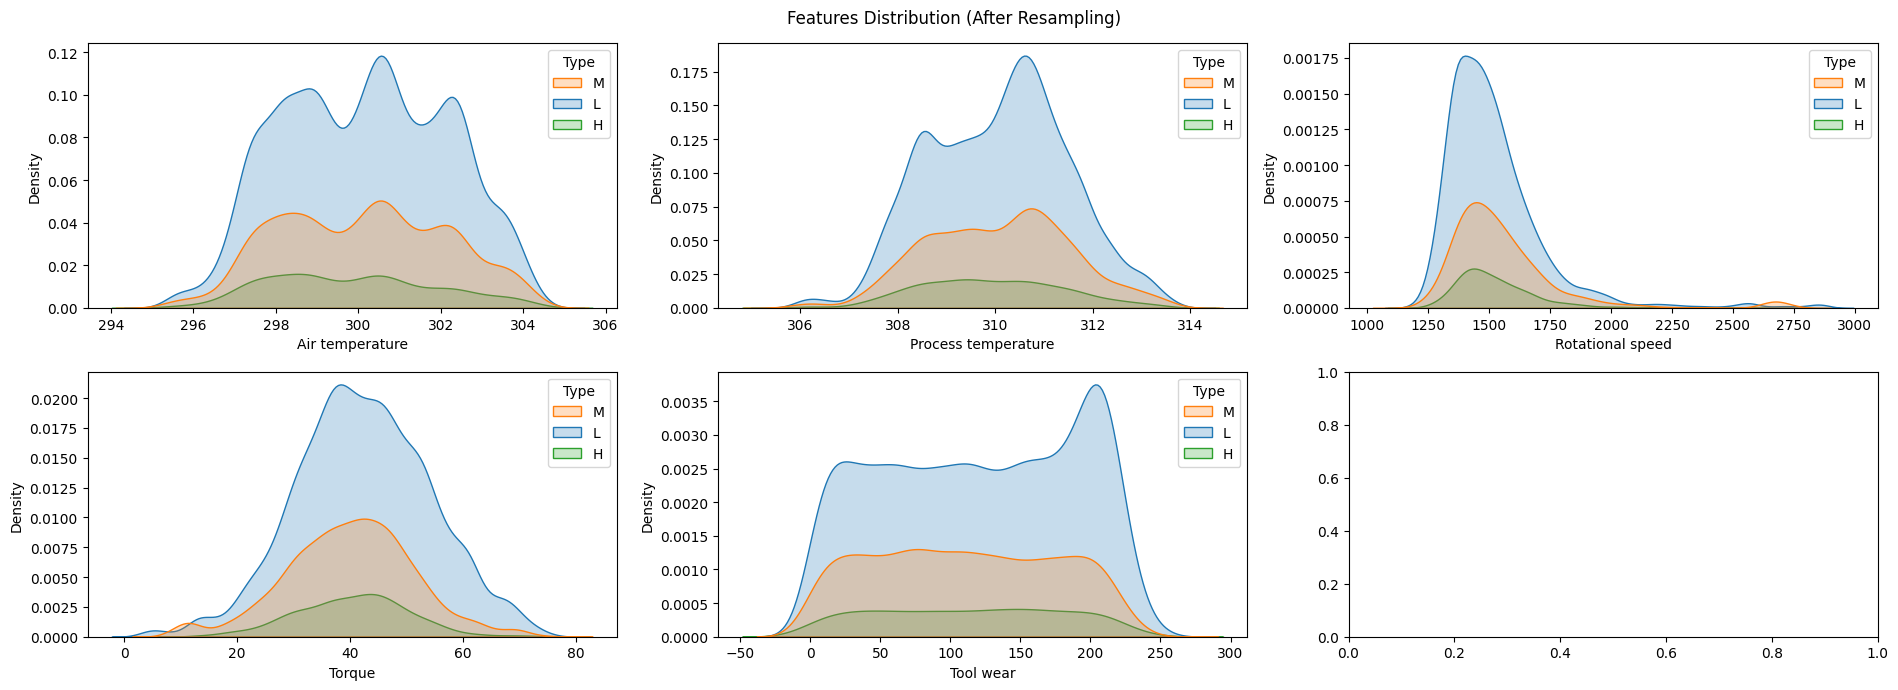

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# KDE plot of numeric features after resampling
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19, 7))
fig.suptitle('Features Distribution (After Resampling)')

# Custom color palette for Type categories
custom_palette = {'L': 'tab:blue', 'M': 'tab:orange', 'H': 'tab:green'}

# Loop through numeric features
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df_res, x=feature,
                hue=df_res['Type'], fill=True, palette=custom_palette)

plt.tight_layout()
plt.show()

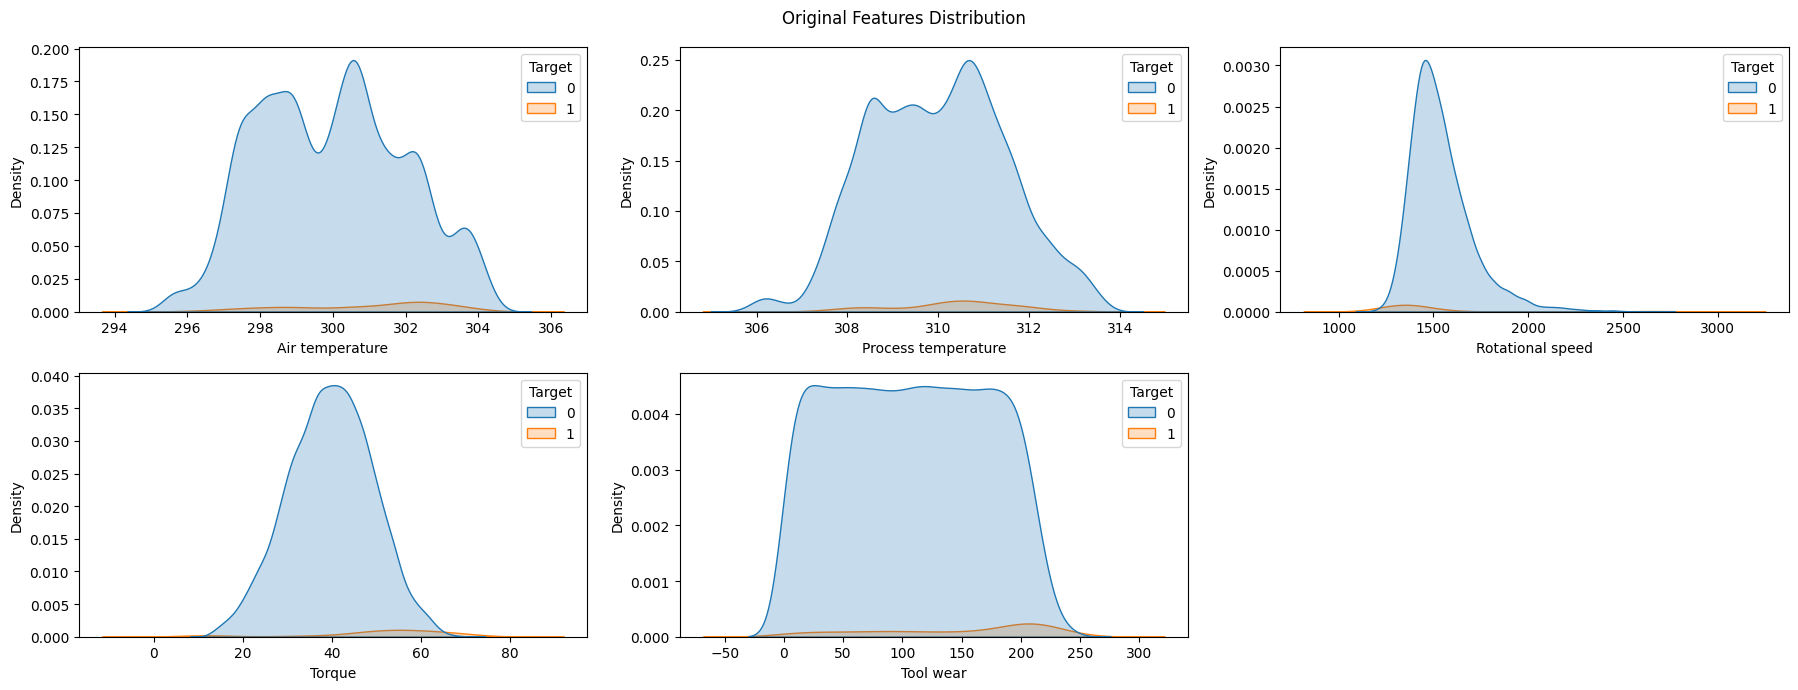

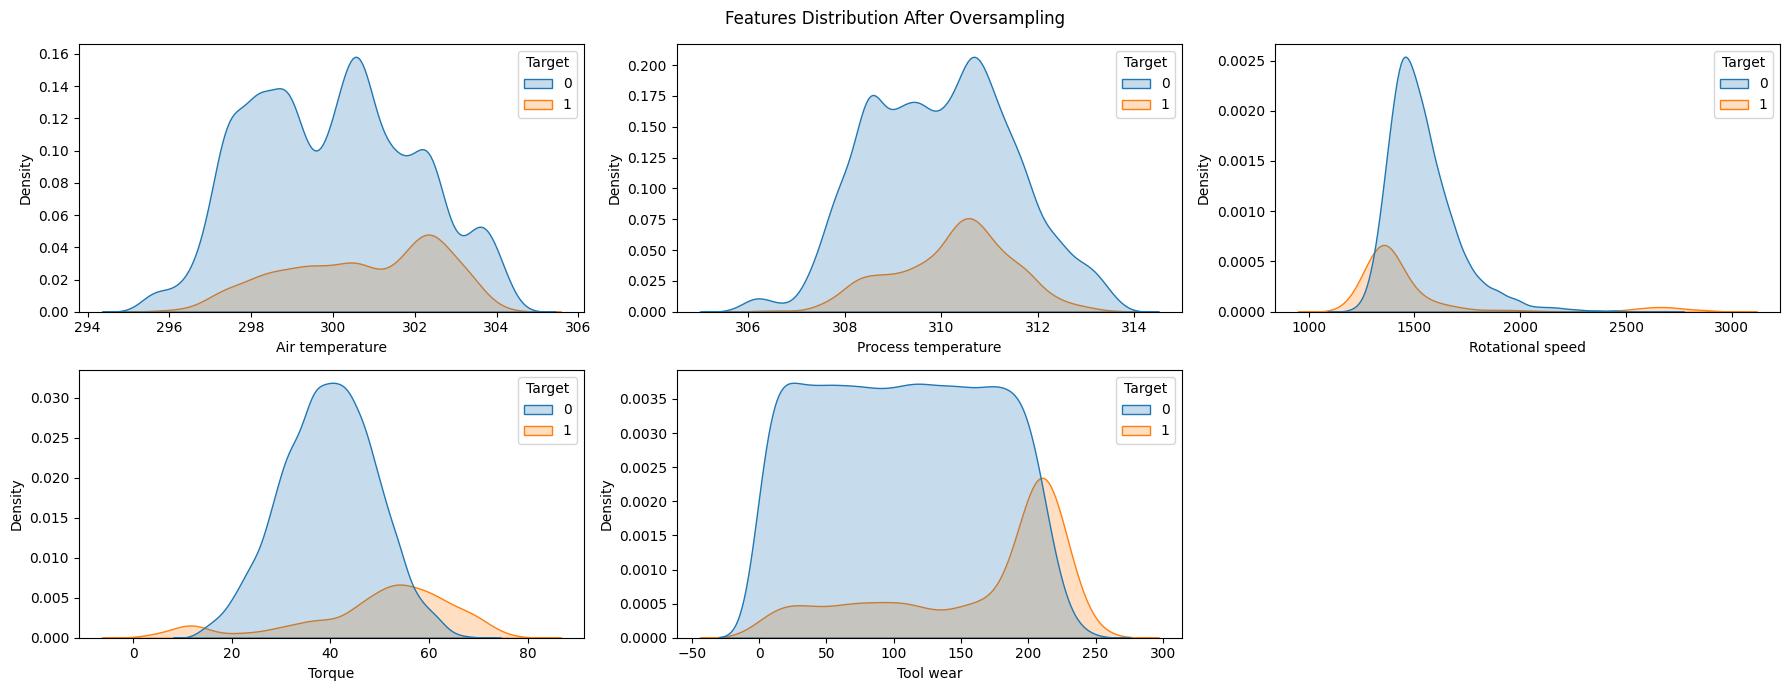

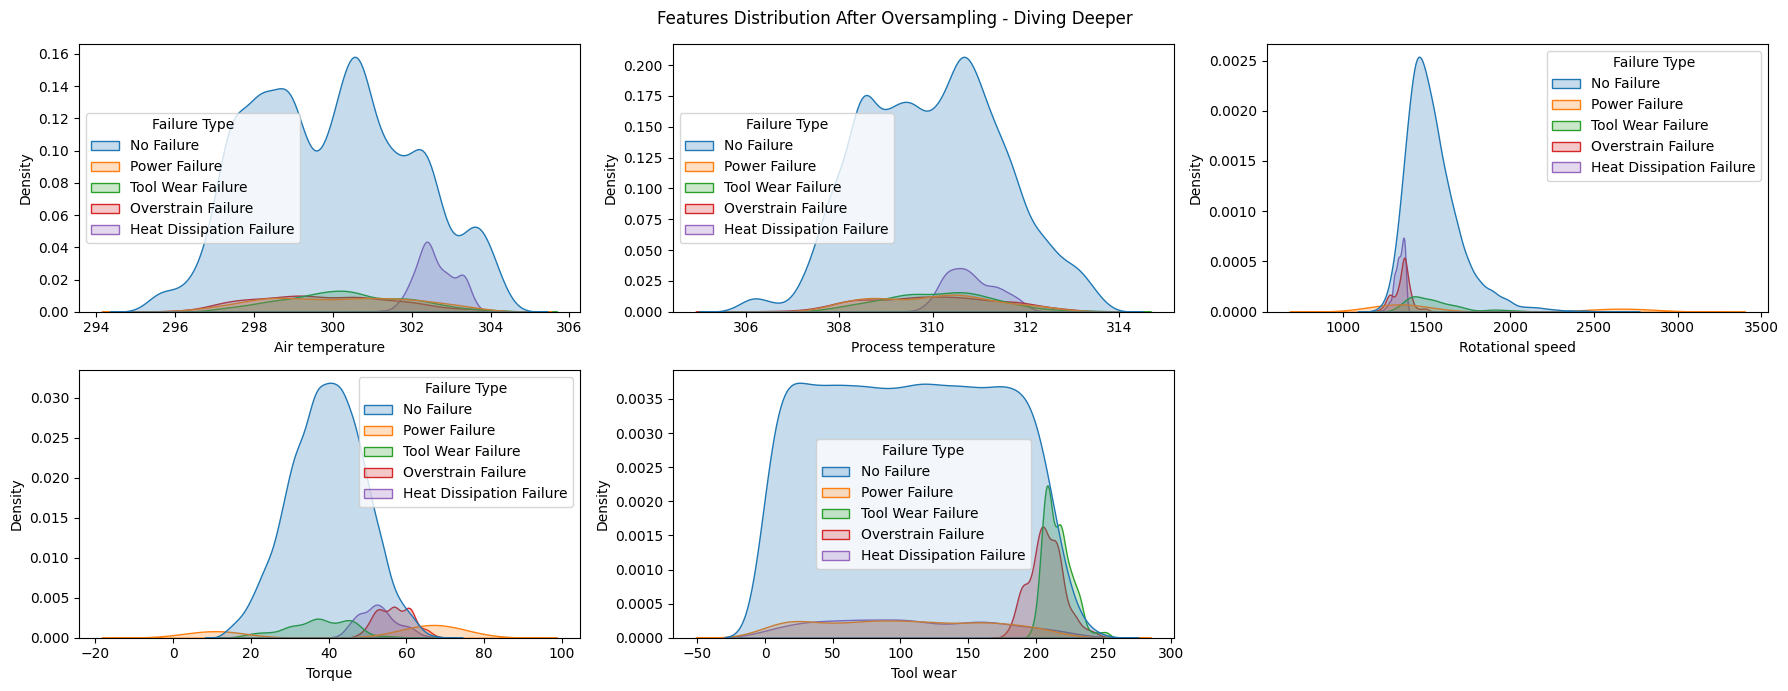

In [31]:
# KDE plot of numeric features (Original) - Hue: Target
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle('Original Features Distribution')

axs = axs.flatten()
for i, feature in enumerate(num_features):
    sns.kdeplot(data=df, x=feature, hue='Target', fill=True, ax=axs[i], palette='tab10')

# Remove empty subplots if features < 6
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling) - Hue: Target
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling')

axs = axs.flatten()
for i, feature in enumerate(num_features):
    sns.kdeplot(data=df_res, x=feature, hue='Target', fill=True, ax=axs[i], palette='tab10')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling) - Hue: Failure Type
fig, axs = plt.subplots(2, 3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling - Diving Deeper')

axs = axs.flatten()
for i, feature in enumerate(num_features):
    sns.kdeplot(data=df_res, x=feature, hue='Failure Type', fill=True, ax=axs[i], palette='tab10')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

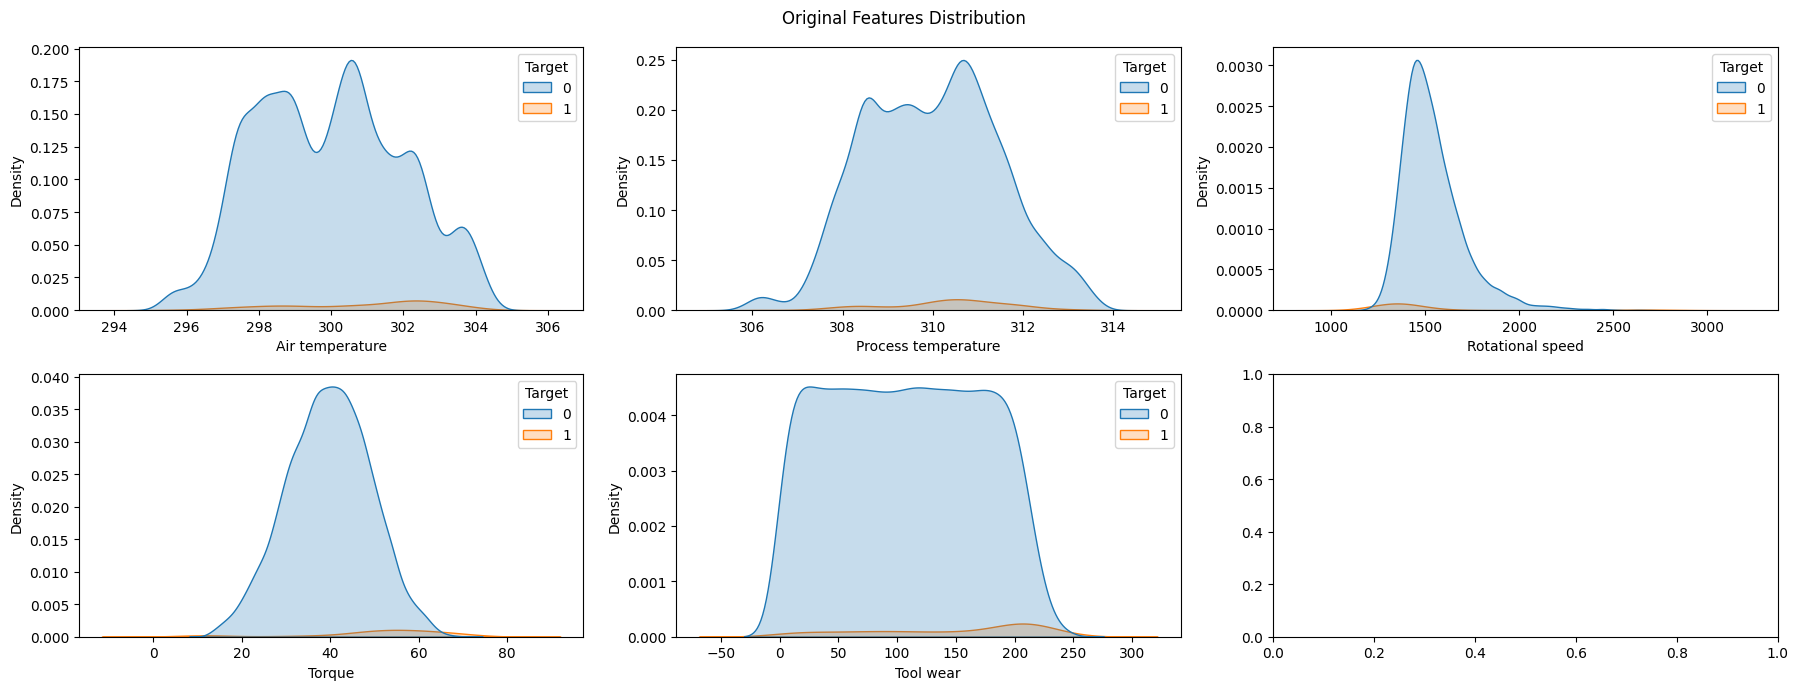

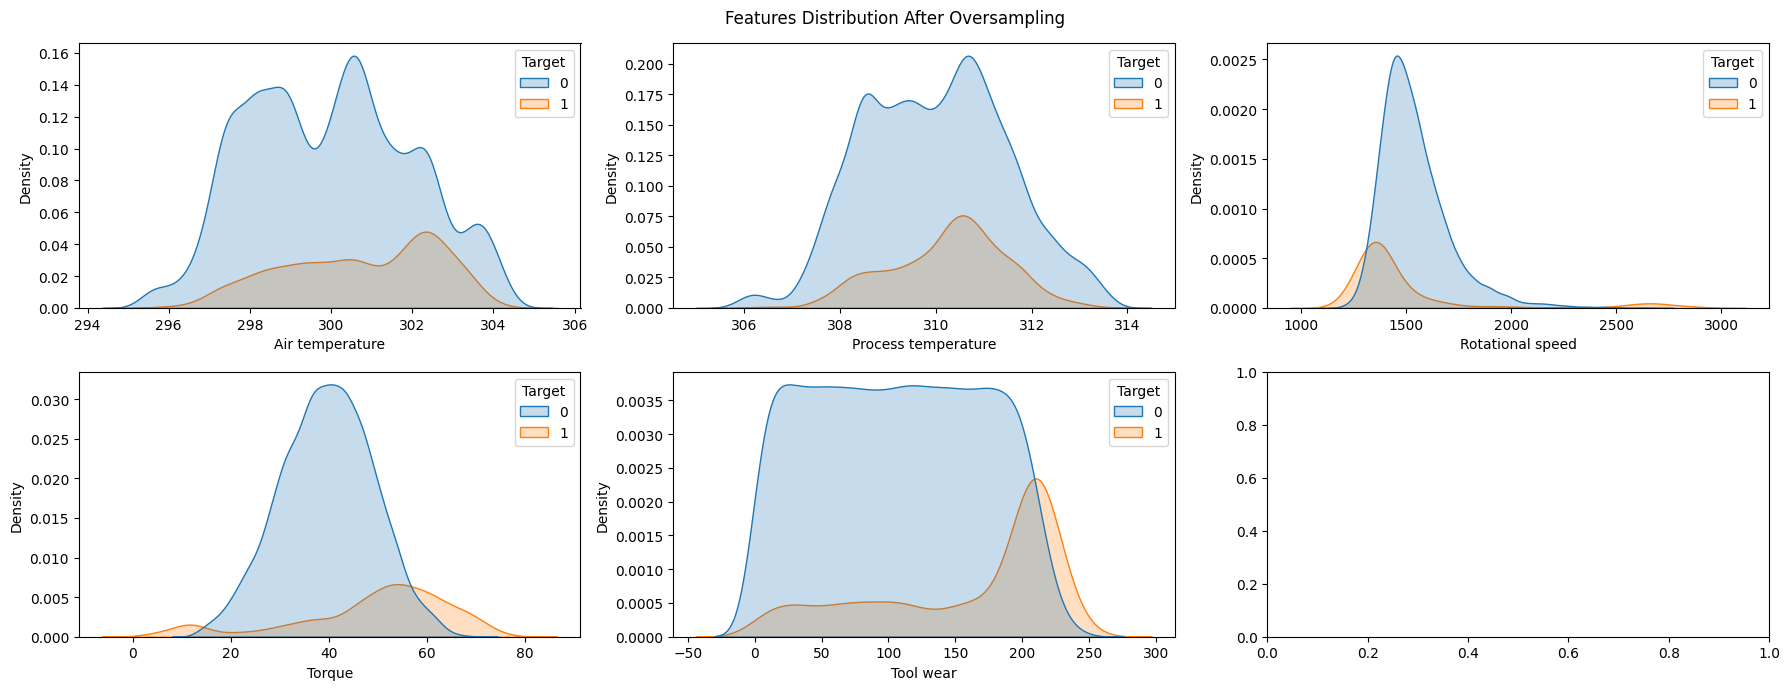

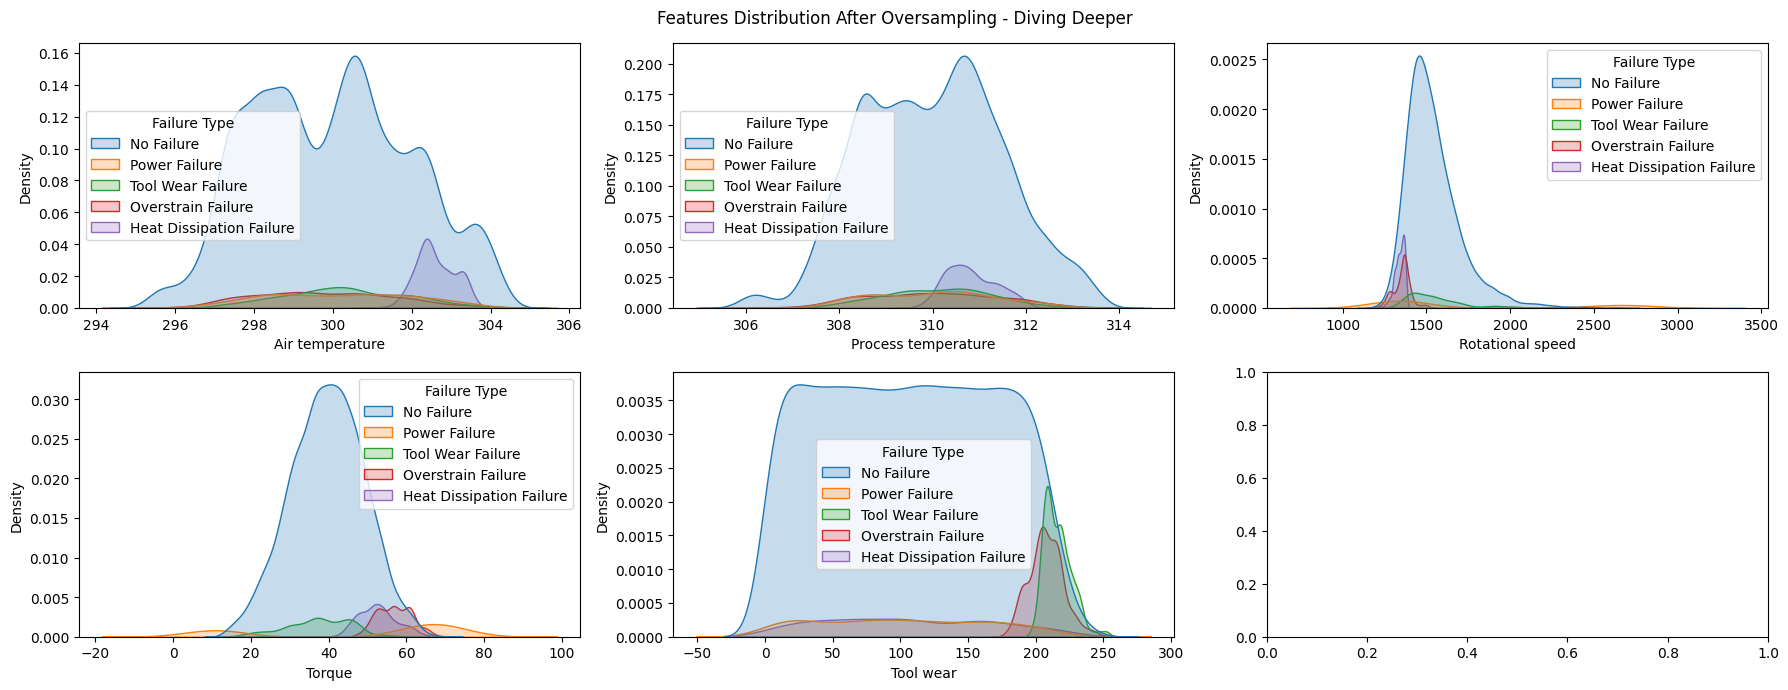

In [32]:
# KDE plot of numeric features (Original)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Original Features Distribution')

for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df, x=feature,
                hue=df['Target'], fill=True, palette='tab10')

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling')

for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df_res, x=feature,
                hue=df_res['Target'], fill=True, palette='tab10')

plt.tight_layout()
plt.show()

# KDE plot of numeric features (After Resampling) - Diving Deeper
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 7))
fig.suptitle('Features Distribution After Oversampling - Diving Deeper')

for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j // 3, j % 3], data=df_res, x=feature,
                hue=df_res['Failure Type'], fill=True, palette='tab10')

plt.tight_layout()
plt.show()

In [33]:
df_ml1 = df_res.copy()

In [34]:
# Encode categorical variables
df_ml1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
df_ml1['Failure Type'].replace({'No Failure': 0, 'Power Failure': 1, 'Overstrain Failure': 2, 'Heat Dissipation Failure': 3, 'Tool Wear Failure': 4}, inplace=True)

<ipython-input-34-d96e9587636d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ml1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
<ipython-input-34-d96e9587636d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ml1['Type'].replace({'L': 0, 'M': 1, 'H': 2}, inplace=True)
<ipython-inp

In [35]:
from sklearn.preprocessing import StandardScaler

# Identify numeric features with dtype float64
num_features = [feature for feature in df_ml1.columns if df_ml1[feature].dtype == 'float64']

# Scale numeric features
df_ml1[num_features] = StandardScaler().fit_transform(df_ml1[num_features])

# **5. Machine Learning Models**

## ML Models - 1 | Target Failure or Not Failure

#### Defining Features (X) and Target (y)

In [36]:
X = df_ml1[['Process temperature', 'Rotational speed', 'Tool wear']]
y = df_ml1['Target']

#### Train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred)
    }

    return results

#### **Train Logistic Regression with GridSearchCV**

In [39]:
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
lr_results = evaluate_model(best_lr, 'Logistic Regression', X_train, X_test, y_train, y_test)


#### **Train KNN with GridSearchCV**

In [40]:
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
knn_results = evaluate_model(best_knn, 'KNN', X_train, X_test, y_train, y_test)

#### **Train SVC with GridSearchCV**

In [41]:
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

best_svm = grid_svm.best_estimator_
svm_results = evaluate_model(best_svm, 'SVM', X_train, X_test, y_train, y_test)

#### **Train Naïve Bayes**

In [42]:
nb = GaussianNB()
nb_results = evaluate_model(nb, 'Naïve Bayes', X_train, X_test, y_train, y_test)

#### **XGBClassifier**

In [43]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
grid_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_
xgb_results = evaluate_model(best_xgb, 'XGBoost', X_train, X_test, y_train, y_test)


#### Model-1 Result

In [46]:
# Collect all results
results_df = pd.DataFrame([lr_results, knn_results, svm_results, nb_results, xgb_results])

# Display results
print(results_df)

                 Model  Train Accuracy  Test Accuracy  F1 Score  Precision  \
0  Logistic Regression        0.805424       0.806354  0.076416   0.828571   
1                  KNN        1.000000       0.921547  0.812912   0.777078   
2                  SVM        0.898745       0.891713  0.724332   0.737822   
3          Naïve Bayes        0.801161       0.807182  0.231278   0.570652   
4              XGBoost        0.987565       0.937293  0.842907   0.844660   

     Recall  
0  0.040055  
1  0.852210  
2  0.711326  
3  0.145028  
4  0.841160  


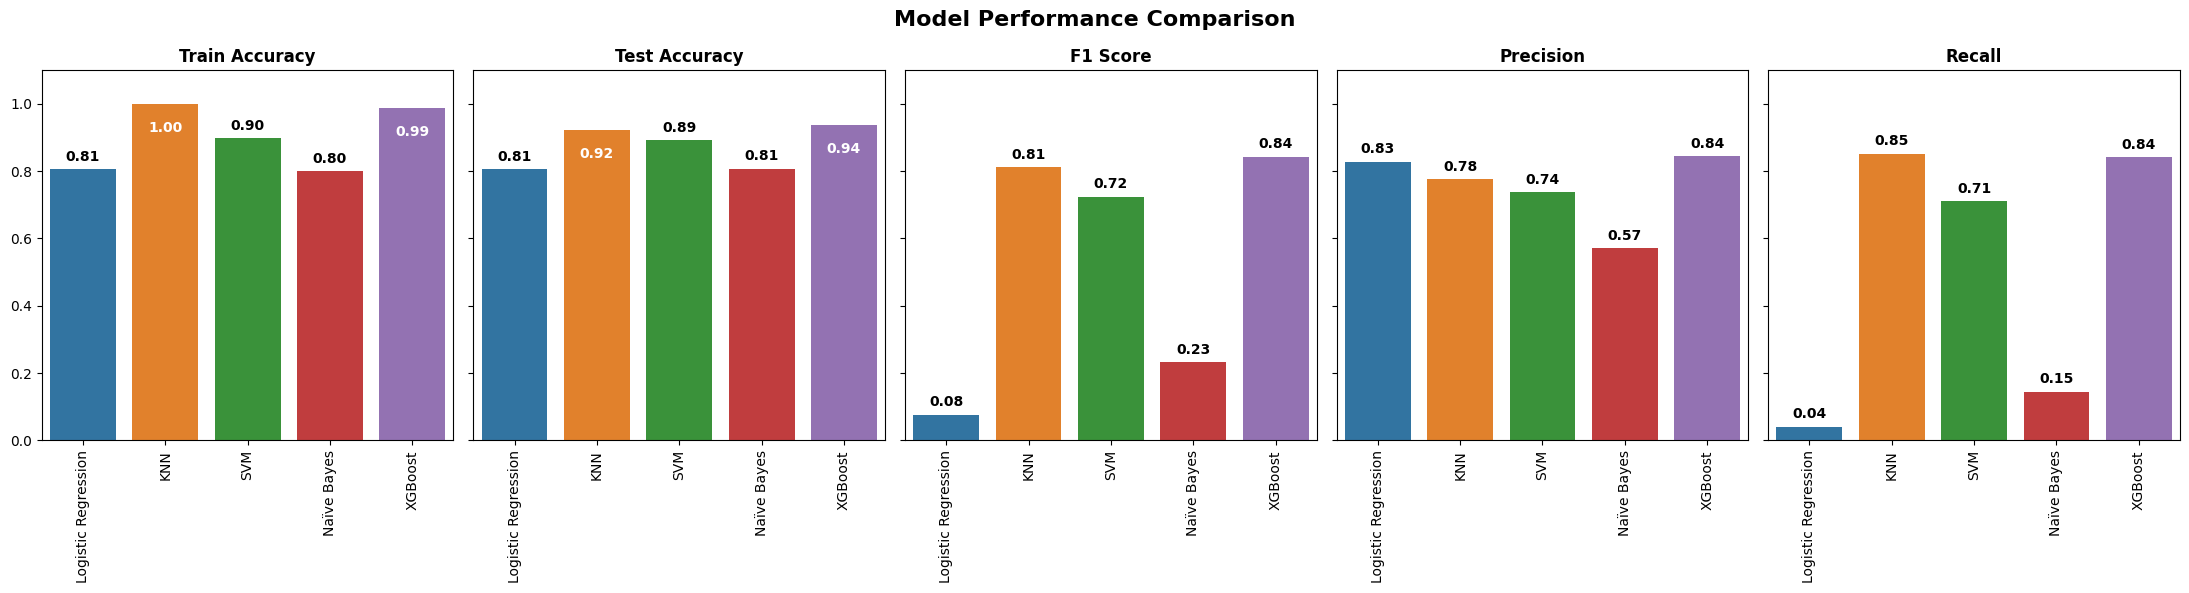

In [47]:
# Collect all results
results_df = pd.DataFrame([lr_results, knn_results, svm_results, nb_results, xgb_results])

# Define metrics to visualize
metrics = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']

# Set figure size
fig, axes = plt.subplots(1, len(metrics), figsize=(22, 6), sharey=True)
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]

    # Use 'hue' to fix the seaborn warning
    bars = sns.barplot(x='Model', y=metric, hue='Model', data=results_df, ax=ax)

    # Set proper x-ticks to avoid warning
    ax.set_xticks(range(len(results_df['Model'])))
    ax.set_xticklabels(results_df['Model'], rotation=90, ha="center")

    # Annotate bars dynamically
    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 6 if height < 0.9 else -20),
                    textcoords="offset points",
                    ha='center', fontsize=10, fontweight='bold',
                    color='black' if height < 0.9 else 'white')  # Change text color dynamically

    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1.1)  # Slightly increase y-limit to avoid text cutoff

plt.tight_layout()
plt.show()

#### Saving the Best in Model-1

In [48]:
import joblib

# Save the best XGBoost model
joblib.dump(best_xgb, 'best_xgb_model.pkl')
print("Best XGBoost model saved as 'best_xgb_model.pkl'")

Best XGBoost model saved as 'best_xgb_model.pkl'


## ML Model - 2 | Failure Type

#### Defining Features (X) and Target (y)

In [49]:
# Select rows where 'Target' is 1
df_failure = df_ml1[df_ml1['Target'] == 1].copy()

# Define features and target
X_failure = df_failure[['Process temperature', 'Rotational speed', 'Tool wear']]
y_failure = df_failure['Failure Type']

#### Train_test_split

In [50]:
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_failure, y_failure, test_size=0.3, random_state=42, stratify=y_failure)

In [51]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred, average='weighted'),
        'Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test, y_test_pred, average='weighted')
    }

#### LogisticRegression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_f, y_train_f)

best_lr = grid_lr.best_estimator_
lr_results = evaluate_model(best_lr, 'Logistic Regression', X_train_f, X_test_f, y_train_f, y_test_f)


#### KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_f, y_train_f)

best_knn = grid_knn.best_estimator_
knn_results = evaluate_model(best_knn, 'KNN', X_train_f, X_test_f, y_train_f, y_test_f)

#### SVC

In [54]:
from sklearn.svm import SVC

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train_f, y_train_f)

best_svm = grid_svm.best_estimator_
svm_results = evaluate_model(best_svm, 'SVM', X_train_f, X_test_f, y_train_f, y_test_f)

#### Naïve Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_f, y_train_f)

nb_results = evaluate_model(nb, 'Naïve Bayes', X_train_f, X_test_f, y_train_f, y_test_f)

#### xgboost

In [56]:
from xgboost import XGBClassifier

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Adjust class labels to start from 0 if necessary
y_train_f_adj = y_train_f - y_train_f.min()
y_test_f_adj = y_test_f - y_test_f.min()

# Define XGBClassifier without `use_label_encoder`
grid_xgb = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=len(set(y_train_f_adj)), eval_metric='mlogloss'),
    param_grid_xgb, cv=5, scoring='accuracy'
)

grid_xgb.fit(X_train_f, y_train_f_adj)

best_xgb = grid_xgb.best_estimator_
xgb_results = evaluate_model(best_xgb, 'XGBoost', X_train_f, X_test_f, y_train_f_adj, y_test_f_adj)


#### Model-2 Result

In [57]:
# Collect all results
results_df = pd.DataFrame([
    lr_results,
    knn_results,
    svm_results,
    nb_results,
    xgb_results
])

# Display results
print(results_df)

                 Model  Train Accuracy  Test Accuracy  F1 Score  Precision  \
0  Logistic Regression        0.771327       0.763812  0.764510   0.795943   
1                  KNN        1.000000       0.888122  0.888666   0.891419   
2                  SVM        0.815166       0.795580  0.797654   0.829865   
3          Naïve Bayes        0.774882       0.761050  0.759673   0.798306   
4              XGBoost        1.000000       0.903315  0.903529   0.904391   

     Recall  
0  0.763812  
1  0.888122  
2  0.795580  
3  0.761050  
4  0.903315  


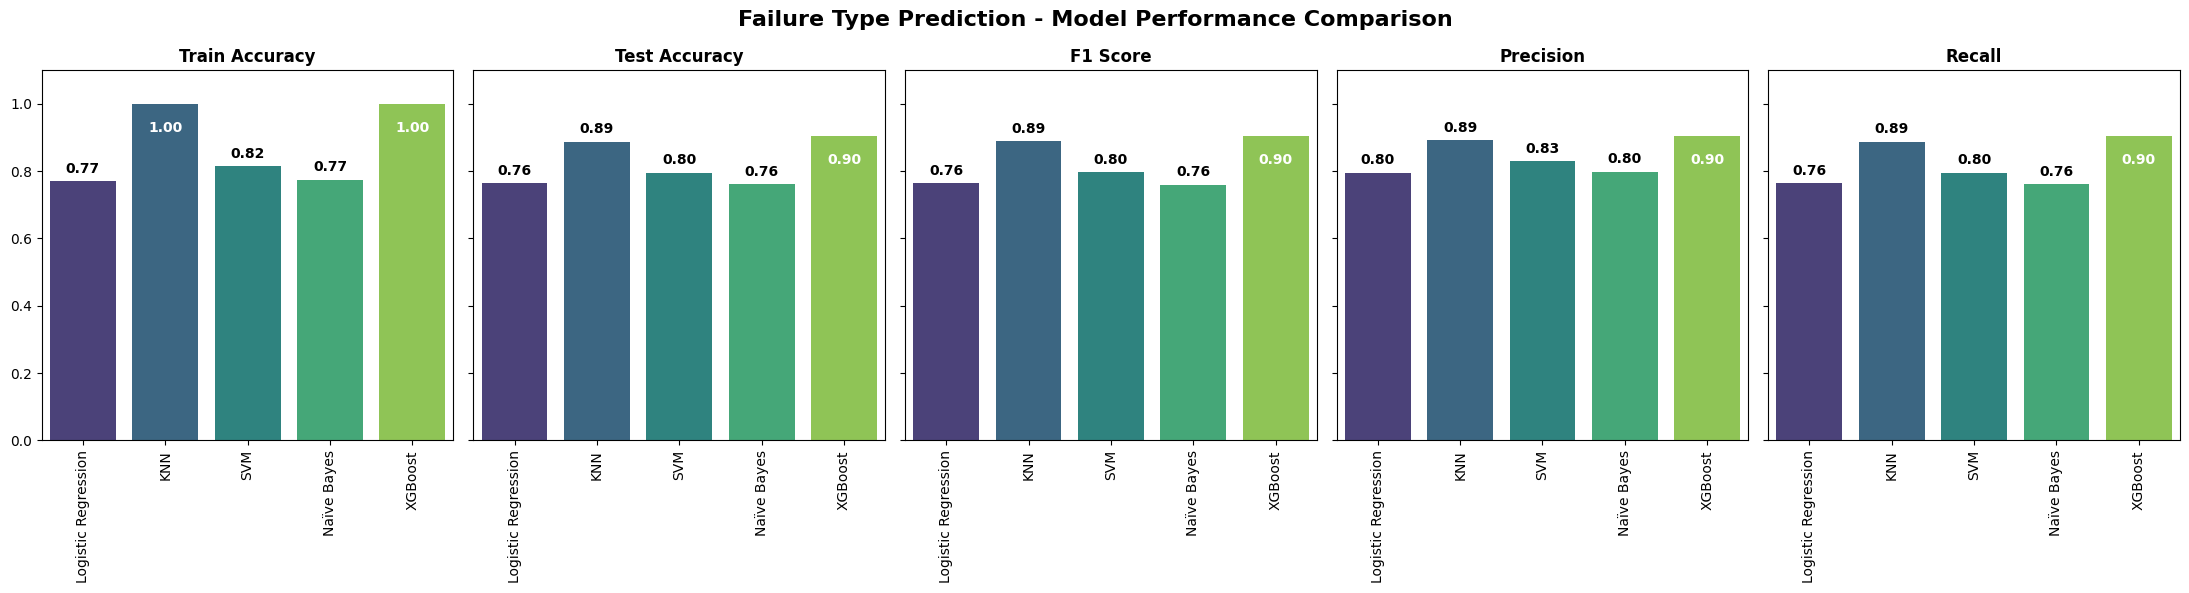

In [58]:
# Collect results
results_df_f = pd.DataFrame([lr_results, knn_results, svm_results, nb_results, xgb_results])

# Define metrics to visualize
metrics = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']

# Set figure size
fig, axes = plt.subplots(1, len(metrics), figsize=(22, 6), sharey=True)
fig.suptitle('Failure Type Prediction - Model Performance Comparison', fontsize=16, fontweight='bold')

# Create bar plots for each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    bars = sns.barplot(x='Model', y=metric, hue='Model', data=results_df_f, ax=ax, palette='viridis')

    ax.set_xticks(range(len(results_df_f['Model'])))
    ax.set_xticklabels(results_df_f['Model'], rotation=90, ha="center")

    for bar in bars.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 6 if height < 0.9 else -20),
                    textcoords="offset points",
                    ha='center', fontsize=10, fontweight='bold',
                    color='black' if height < 0.9 else 'white')

    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 1.1)  # Slightly increase y-limit to avoid text cutoff

plt.tight_layout()
plt.show()

#### Saving the Best in Model-2

In [59]:
# Save the best XGBoost model
joblib.dump(best_xgb, 'best_xgb_model2.pkl')
print("Model saved as best_xgb_model2.pkl")

Model saved as best_xgb_model2.pkl


# **6. Model Deployment**

In [60]:
!pip install pyngrok
!ngrok authtoken 2tuU1MF7s5T7cAyFNWMyVRNEhFT_4FJByH9mu2e38GpQMwRZc

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import joblib
from flask import Flask, request, jsonify, render_template_string
from pyngrok import ngrok

# Load the models
model_target = joblib.load("best_xgb_model.pkl")  # Model for predicting Failure/No Failure
model_failure_type = joblib.load("best_xgb_model2.pkl")  # Model for predicting Failure Type

# Failure Type Mapping (as used during training)
failure_type_mapping = {
    0: "No Failure",
    1: "Power Failure",
    2: "Overstrain Failure",
    3: "Heat Dissipation Failure",
    4: "Tool Wear Failure"
}

# Initialize Flask App
app = Flask(__name__)

# HTML Template for User Input
HTML_TEMPLATE = """
<!DOCTYPE html>
<html>
<head>
    <title>Predictive Maintenance Model</title>
</head>
<body>
    <h2>Enter Machine Parameters</h2>
    <form action="/predict" method="post">
        <label for="machine_type">Machine Type:</label>
        <select name="machine_type">
            <option value="0">L</option>
            <option value="1">M</option>
            <option value="2">H</option>
        </select><br><br>

        <label for="air_temp">Air Temperature [K]:</label>
        <input type="number" step="any" name="air_temp" required><br><br>

        <label for="process_temp">Process Temperature [K]:</label>
        <input type="number" step="any" name="process_temp" required><br><br>

        <label for="rot_speed">Rotational Speed [rpm]:</label>
        <input type="number" step="any" name="rot_speed" required><br><br>

        <label for="torque">Torque [Nm]:</label>
        <input type="number" step="any" name="torque" required><br><br>

        <label for="tool_wear">Tool Wear [min]:</label>
        <input type="number" step="any" name="tool_wear" required><br><br>

        <button type="submit">Predict</button>
    </form>

    {% if prediction is not none %}
        <h3>Prediction: {{ prediction }}</h3>
        {% if failure_type is not none %}
            <h3>Failure Type: {{ failure_type }}</h3>
        {% endif %}
    {% endif %}
</body>
</html>
"""

@app.route("/", methods=["GET", "POST"])
def home():
    return render_template_string(HTML_TEMPLATE)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        if request.form:
            # Extract user input
            data = {
                "Type": int(request.form["machine_type"]),  # Convert to integer (0=L, 1=M, 2=H)
                "Air temperature": float(request.form["air_temp"]),
                "Process temperature": float(request.form["process_temp"]),
                "Rotational speed": float(request.form["rot_speed"]),
                "Torque": float(request.form["torque"]),
                "Tool wear": float(request.form["tool_wear"]),
            }
        else:
            data = request.get_json()

        # Convert to DataFrame
        df = pd.DataFrame([data])
        print(df[['Process temperature', 'Rotational speed', 'Tool wear']])

        # **Step 1: Predict Failure or No Failure**
        target_prediction = model_target.predict(df[['Process temperature', 'Rotational speed', 'Tool wear']])[0]
        prediction_text = "Failure" if target_prediction == 1 else "No Failure"

        failure_type_text = None  # Default to None

        if target_prediction == 1:
            # **Step 2: Predict Failure Type if Target is Failure**

            # Explicitly rename features to match those used in `best_xgb_model2.pkl`
            df_failure = df.rename(columns={
                "Process temperature [K]": "Process temperature",
                "Rotational speed [rpm]": "Rotational speed",
                "Tool wear [min]": "Tool wear"
            })

            # Select only the required columns for failure type prediction
            df_failure = df_failure[["Process temperature", "Rotational speed", "Tool wear"]]

            # Predict failure type
            failure_type_prediction = model_failure_type.predict(df_failure)[0]
            failure_type_text = failure_type_mapping.get(failure_type_prediction, "Unknown Failure Type")

        return render_template_string(HTML_TEMPLATE, prediction=prediction_text, failure_type=failure_type_text)

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    PORT = 5001  # Change port if needed

    # Start ngrok tunnel
    public_url = ngrok.connect(PORT).public_url
    print(f"Public URL: {public_url}")

    # Run Flask App
    app.run(port=PORT)


Public URL: https://2f08-34-106-195-113.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [06/Mar/2025 11:21:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Mar/2025 11:21:19] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [06/Mar/2025 11:25:36] "GET / HTTP/1.1" 200 -


# **Key Challenges in the Project**


**Imbalanced Data Handling** – Failure cases were significantly fewer than non-failure cases, requiring techniques like SMOTE or class weighting to improve model performance.

**Feature Scaling Issue** – The 'Type' column (categorical) was mistakenly scaled, leading to errors in model input shape, which needed careful preprocessing adjustments.

**Model Selection & Optimization** – Finding the best-performing model among Logistic Regression, KNN, SVM, Naïve Bayes, and XGBoost required extensive hyperparameter tuning.

**Deployment with Flask & Ngrok** – Setting up a web interface and ensuring proper API responses while managing Ngrok tunnel connectivity issues.

**Real-Time Prediction Performance** – Ensuring that predictions were fast and accurate, while handling unexpected input errors gracefully.

# **Conclusion**

This project develops a Machine Failure Prediction System using XGBoost models, handling imbalanced data with techniques like SMOTE or class weighting for better accuracy. It preprocesses data with feature scaling (excluding categorical 'Type') to ensure consistency. The system is deployed via Flask and Ngrok, enabling remote access. It provides real-time failure detection and classification based on machine parameters. This solution enhances predictive maintenance, reducing downtime and improving industrial efficiency.

# **Framework and Referance**

## Industrial Equipment Predictive Maintenance Dataset

This dataset contains sensor readings from industrial machines and their corresponding failure types. Each row represents a machine's operational parameters at a given time, along with its failure classification.

| Type | Air Temperature [K] | Process Temperature [K] | Rotational Speed [rpm] | Torque [Nm] | Tool Wear [min] | Failure (1=Yes, 0=No) | Failure Type |
|------|---------------------|-------------------------|------------------------|-------------|----------------|------------------------|--------------|
| L    | 298.9               | 309.1                   | 2861                   | 4.6         | 143            | 1                      | Power Failure |
| L    | 298.9               | 309.0                   | 1410                   | 65.7        | 191            | 1                      | Power Failure |
| L    | 298.8               | 308.9                   | 1455                   | 41.3        | 208            | 1                      | Tool Wear Failure |
| L    | 298.4               | 308.2                   | 1282                   | 60.7        | 216            | 1                      | Overstrain Failure |
| L    | 298.3               | 308.1                   | 1412                   | 52.3        | 218            | 1                      | Overstrain Failure |
| L    | 298.4               | 308.3                   | 1433                   | 62.3        | 20             | 1                      | Power Failure |
| M    | 298.2               | 308.5                   | 2678                   | 10.7        | 86             | 1                      | Power Failure |
| M    | 298.4               | 308.7                   | 1421                   | 60.7        | 119            | 1                      | Power Failure |
| L    | 298.0               | 308.2                   | 1348                   | 58.8        | 202            | 1                      | Overstrain Failure |
| L    | 298.0               | 308.3                   | 1362                   | 56.8        | 216            | 1                      | Overstrain Failure |
| L    | 298.0               | 308.3                   | 1405                   | 56.2        | 218            | 1                      | Overstrain Failure |
| M    | 298.1               | 308.2                   | 1420                   | 63.9        | 19             | 1                      | Power Failure |
| L    | 297.7               | 308.5                   | 1373                   | 56.7        | 203            | 1                      | Overstrain Failure |
| L    | 297.5               | 308.3                   | 2564                   | 12.8        | 127            | 1                      | Power Failure |
| L    | 297.4               | 308.5                   | 1399                   | 61.5        | 61             | 1                      | Power Failure |
| L    | 297.4               | 308.7                   | 2874                   | 4.2         | 118            | 1                      | Power Failure |
| L    | 297.6               | 309.6                   | 1501                   | 49.8        | 222            | 1                      | Overstrain Failure |
| L    | 297.9               | 309.8                   | 1336                   | 71.6        | 31             | 1                      | Power Failure |
| L    | 296.8               | 308.1                   | 1289                   | 62.0        | 199            | 1                      | Overstrain Failure |
| L    | 296.4               | 307.4                   | 2833                   | 5.6         | 213            | 1                      | Power Failure |
| M    | 295.8               | 306.3                   | 1235                   | 76.2        | 89             | 1                      | Power Failure |
| L    | 295.7               | 306.2                   | 2270                   | 14.6        | 149            | 1                      | Power Failure |
| L    | 295.6               | 306.1                   | 1372                   | 55.6        | 215            | 1                      | Overstrain Failure |
| M    | 296.3               | 307.2                   | 1319                   | 68.3        | 24             | 1                      | Power Failure |
| L    | 297.0               | 307.8                   | 1385                   | 56.4        | 202            | 1                      | Overstrain Failure |
| H    | 296.9               | 307.8                   | 1549                   | 35.8        | 206            | 1                      | Tool Wear Failure |
| L    | 296.9               | 307.5                   | 2721                   | 9.3         | 18             | 1                      | Power Failure |
| H    | 296.6               | 307.7                   | 1386                   | 62.3        | 100            | 1                      | Power Failure |
| M    | 296.7               | 307.8                   | 1258                   | 69.0        | 105            | 1                      | Power Failure |

---

> **Note:**  
> - `Failure` column: **1** = Machine Failure, **0** = No Failure.  
> - `Failure Type`: The reason for failure (e.g., **Power Failure, Overstrain Failure, Tool Wear Failure**).  
> - The dataset captures operational parameters like **temperature, rotational speed, torque, and tool wear** to predict failures.  

---

## **How to Use This Data?**
1. Train a **predictive maintenance model** to classify failure vs. no failure.
2


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

# Load trained models
model_target = joblib.load("best_xgb_model.pkl")  # Model for Failure/No Failure
model_failure_type = joblib.load("best_xgb_model2.pkl")  # Model for Failure Type

# Failure Type Mapping (as used during training)
failure_type_mapping = {
    0: "No Failure",
    1: "Power Failure",
    2: "Overstrain Failure",
    3: "Heat Dissipation Failure",
    4: "Tool Wear Failure"
}

# Reverse mapping (for comparison with actual values)
failure_type_reverse_mapping = {v: k for k, v in failure_type_mapping.items()}

# ✅ **Load Your Data**
data = [
    ["L", 298.9, 309.1, 2861, 4.6, 143, 1, "Power Failure"],
    ["L", 298.9, 309.0, 1410, 65.7, 191, 1, "Power Failure"],
    ["L", 298.8, 308.9, 1455, 41.3, 208, 1, "Tool Wear Failure"],
    ["L", 298.4, 308.2, 1282, 60.7, 216, 1, "Overstrain Failure"],
    ["L", 298.3, 308.1, 1412, 52.3, 218, 1, "Overstrain Failure"],
    ["L", 298.4, 308.3, 1433, 62.3, 20, 1, "Power Failure"],
    ["M", 298.2, 308.5, 2678, 10.7, 86, 1, "Power Failure"],
    ["M", 298.4, 308.7, 1421, 60.7, 119, 1, "Power Failure"],
    ["L", 298.0, 308.2, 1348, 58.8, 202, 1, "Overstrain Failure"],
    ["L", 298.0, 308.3, 1362, 56.8, 216, 1, "Overstrain Failure"],
]

# Convert to DataFrame
columns = ["Type", "Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Actual Failure", "Actual Failure Type"]
df = pd.DataFrame(data, columns=columns)
df

In [ ]:
# ✅ **Preprocess Data for Model**
# Encode Machine Type (L=0, M=1, H=2)
df["Type"] = df["Type"].map({"L": 0, "M": 1, "H": 2})

# **Step 1: Predict Failure or No Failure**
df["Predicted Failure"] = model_target.predict(df.drop(columns=["Type", "Actual Failure", "Actual Failure Type", "Air temperature", "Torque"]))
df

In [ ]:

# **Step 2: Predict Failure Type if Failure is Detected**
df["Predicted Failure Type"] = "No Failure"
failure_rows = df["Predicted Failure"] == 1  # Select rows where failure is predicted

# Select features required for failure type prediction
failure_features = df[failure_rows].rename(columns={
    "Process temperature [K]": "Process temperature",
    "Rotational speed [rpm]": "Rotational speed",
    "Tool wear [min]": "Tool wear"
})[["Process temperature", "Rotational speed", "Tool wear"]]

# Predict failure type for failed cases
if not failure_features.empty:
    failure_predictions = model_failure_type.predict(failure_features)
    df.loc[failure_rows, "Predicted Failure Type"] = failure_predictions
    df["Predicted Failure Type"] = df["Predicted Failure Type"].replace(failure_type_mapping)

# ✅ **Compare Predictions with Actual Labels**
df["Actual Failure Type"] = df["Actual Failure Type"].replace(failure_type_reverse_mapping)  # Convert actual failure type to numbers for comparison
df["Predicted Failure Type"] = df["Predicted Failure Type"].replace(failure_type_reverse_mapping)  # Convert predictions to numbers for comparison

# **Evaluate Model Performance**
failure_accuracy = accuracy_score(df["Actual Failure"], df["Predicted Failure"])
failure_type_accuracy = accuracy_score(df[df["Actual Failure"] == 1]["Actual Failure Type"], df[df["Actual Failure"] == 1]["Predicted Failure Type"])

print("\n✅ **Failure Detection Accuracy:**", round(failure_accuracy * 100, 2), "%")
print("✅ **Failure Type Classification Accuracy:**", round(failure_type_accuracy * 100, 2), "%\n")

print("\n📊 **Classification Report for Failure Detection:**\n", classification_report(df["Actual Failure"], df["Predicted Failure"]))
print("\n📊 **Classification Report for Failure Type Prediction:**\n", classification_report(df[df["Actual Failure"] == 1]["Actual Failure Type"], df[df["Actual Failure"] == 1]["Predicted Failure Type"]))